In [29]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

alpha_color = 0.5

In [30]:
data = pd.read_csv("./train.csv")

In [31]:

data.shape

(891, 12)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>Ages of youngest and oldest person on board</b>

In [125]:
data['Age'].min(), data['Age'].max()

(0.42, 80.0)

<h3>Number of people from each class</h3>

In [158]:
df = pd.DataFrame([data['Pclass'].value_counts().sort_index()])
df.columns = ['Class 1','Class 2','Class 3']
df.index = ['Count']
df

,Class 1,Class 2,Class 3
Count,216,184,491


<h2>Survival Percentage</h2>

In [159]:
df = pd.DataFrame([data['Survived'].value_counts()*100/len(data)])
df.index = ['Percentage']
df.columns = ['Death', 'Survival']
df

,Death,Survival
Percentage,61.616162,38.383838


<h2>Inference</h2>

Around 62% people on board were killed in the titanic disaster from the available data while only 38% lived

<h2>Sex Distribution</h2>

In [229]:
df = pd.DataFrame([data['Sex'].value_counts()*100/len(data)])
df.index=['Percentage']
df

,male,female
Percentage,64.758698,35.241302


<h2>Boarding From Embarkments</h2>

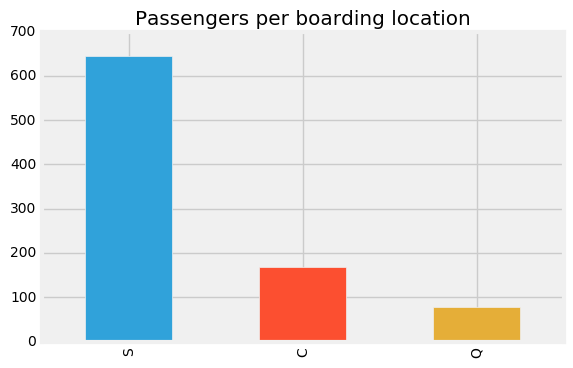

In [165]:
data.Embarked.value_counts().plot(kind='bar')
plt.title("Passengers per boarding location")

<h2>Inference</h2>

A large number of people boarded from the Port S

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


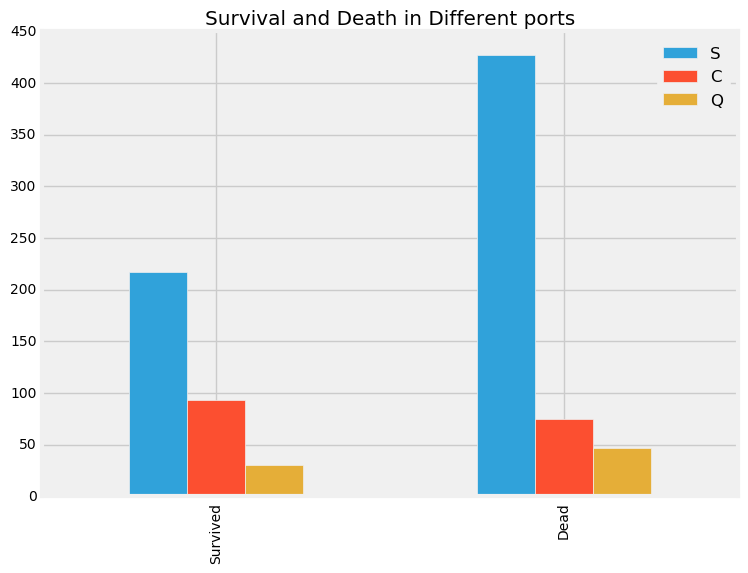

In [230]:
survived = data[data['Survived']==1]['Embarked'].value_counts()
dead = data[data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=False, figsize=(8,6))
plt.title("Survival and Death in Different ports")

#OR sns.barplot(x='Embarked',y='Survived',data=data)

data[['Embarked','Survived']].groupby('Embarked',as_index=False).mean().sort_values(by='Survived',ascending=False)

<h2>Inference</h2>
<br>
<p><b>Boarding from Port C gave better chances of survival</b></p>

<h2>Survival Count</h2>

In [231]:
df = pd.DataFrame([data['Survived'].value_counts(),data['Survived'].value_counts()*100/len(data)])
df.index = ['Count','Percentage']
df.columns = ['Dead','Survived']
df

,Dead,Survived
Count,549.000000,342.000000
Percentage,61.616162,38.383838


<h2>Inference</h2>

549 people from the 891 in the given data died while 342 survived

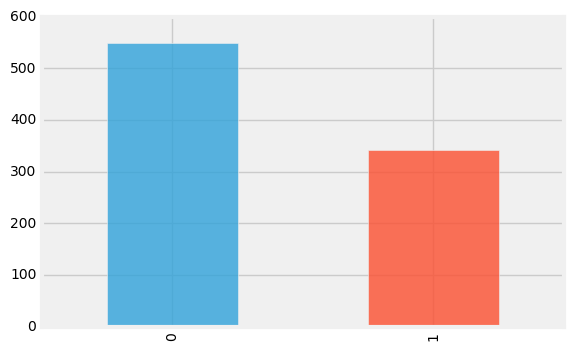

In [233]:
data['Survived'].value_counts().plot(kind='bar',alpha=0.8)


In [234]:
df = pd.DataFrame([data['Sex'].value_counts(),data['Sex'].value_counts()*100/len(data)])
df.index = ['Count','Percentage']
df.columns = ['Male','Female']
df

,Male,Female
Count,577.000000,314.000000
Percentage,64.758698,35.241302


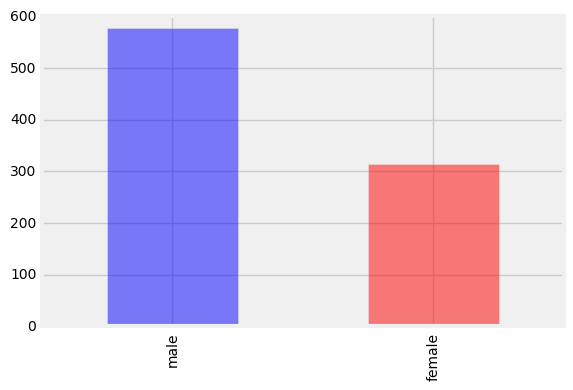

In [235]:
data['Sex'].value_counts().plot(kind='bar',alpha=alpha_color,color=['b','r'])

In [236]:
female_surv = data[data['Sex']=='female'][data['Survived']==1]['Sex'].value_counts()/len(data[data['Sex']=='female']['Sex'])
male_surv = data[data['Sex']=='male'][data['Survived']==1]['Sex'].value_counts()/len(data[data['Sex']=='male']['Sex'])


/home/aditya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/aditya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [42]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<h3>Male Survival Ratio</h3>

In [186]:
male_surv

male    0.188908
Name: Sex, dtype: float64

<h3>Female Survival Ratio</h3>

In [187]:
female_surv

female    0.742038
Name: Sex, dtype: float64

<h2>Inference</h2>

<b>Being a Female gave you better chances of survival<b>

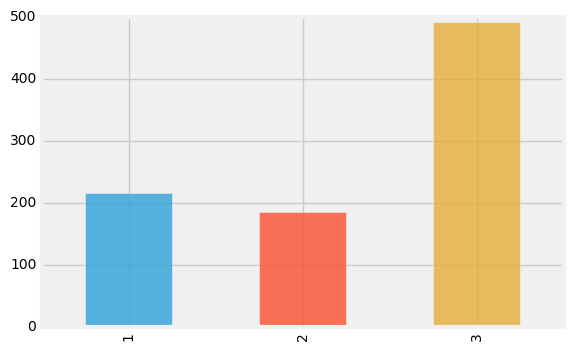

In [237]:
data['Pclass'].value_counts().sort_index().plot(kind='bar',alpha=0.8) 

/home/aditya/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


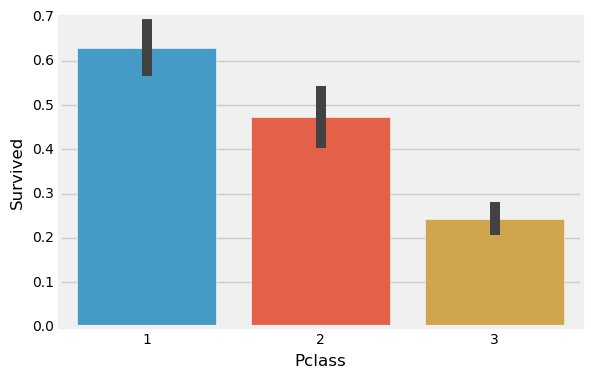

In [238]:
sns.barplot(x='Pclass',y='Survived',data=data)


In [239]:
class1_survived = data[data['Pclass']==1][data['Survived']==1]['Pclass'].value_counts()*100/len(data[data['Pclass']==1])
class2_survived = data[data['Pclass']==2][data['Survived']==1]['Pclass'].value_counts()*100/len(data[data['Pclass']==2])
class3_survived = data[data['Pclass']==3][data['Survived']==1]['Pclass'].value_counts()*100/len(data[data['Pclass']==3])


/home/aditya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/aditya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/home/aditya/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


In [240]:
df = pd.concat([class1_survived, class2_survived,class3_survived]).to_frame()
df.columns = ['Percentage']
df

,Percentage
1,62.962963
2,47.282609
3,24.236253


<h2>Inference</h2>

Passenger in Pclass 3 have lower chances of survival.Clearly Class had an effect on survival of each passenger with the percentages of survival being 62.96%, 47.28%, 24.23% for Pclass 1, 2 and 3 respectively. Thus, belonging to Pclass = 1 had a huge advantage.

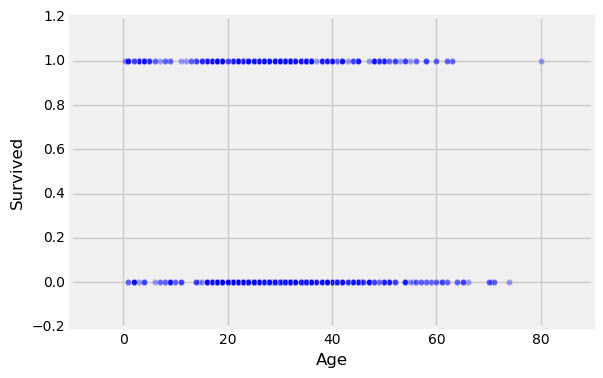

In [241]:
data.plot(kind='scatter', x='Age',y='Survived',color=['b'],alpha=0.35)


In [242]:
print('Oldest person Survived was of:',data['Age'].max())
print('Youngest person Survived was of:',data['Age'].min())
print('Average person Survived was of:',data['Age'].mean())

Oldest person Survived was of: 80.0
Youngest person Survived was of: 0.42
Average person Survived was of: 29.69911764705882


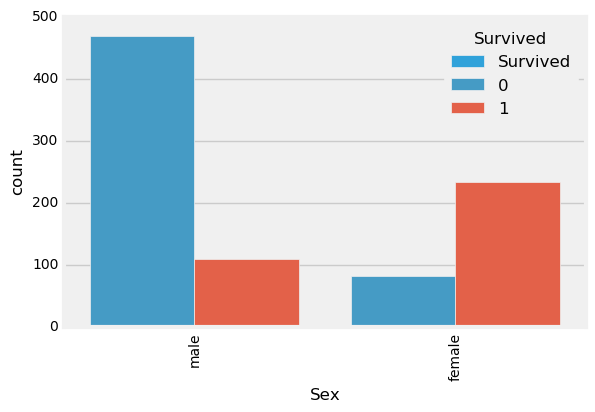

In [243]:
data.groupby(['Sex','Survived'])['Survived'].mean().plot.bar()
sns.countplot('Sex',hue='Survived',data=data)
plt.show()

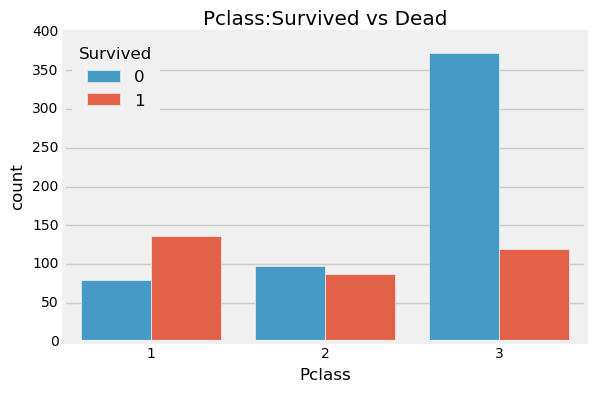

In [244]:
sns.countplot('Pclass',hue='Survived',data=data)
plt.title('Pclass:Survived vs Dead')
plt.show()

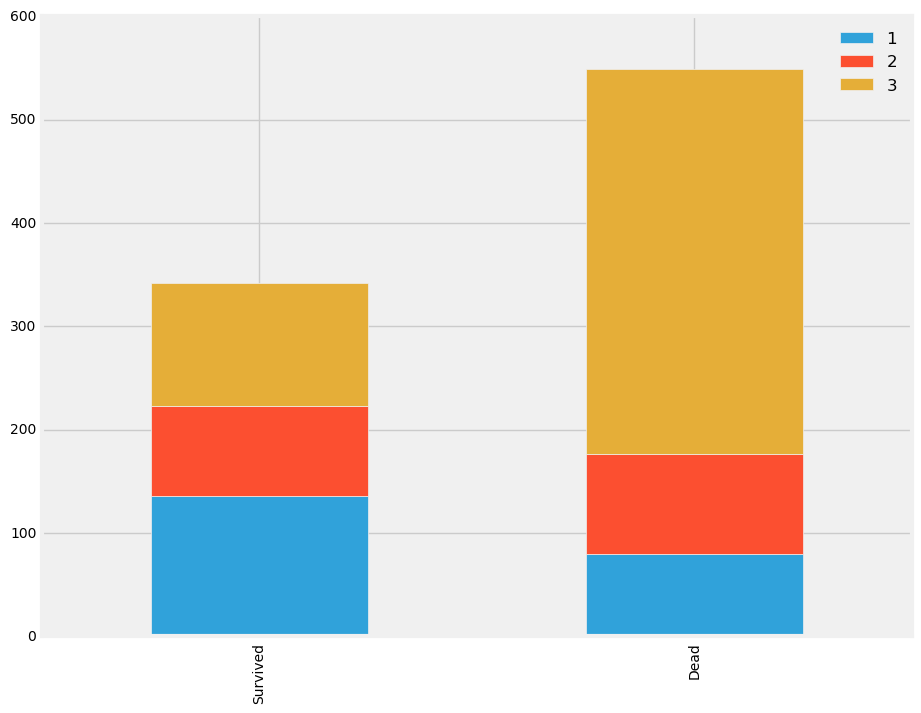

In [245]:
pclass_survived = data[data['Survived']==1]['Pclass'].value_counts()
pclass_dead = data[data['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([pclass_survived,pclass_dead])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(10,8))

In [71]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')


<h2>Inference</h2>

Women were given more preference from higher classes. As we can see the only total of 3+6=9 women from Class 1 and Class 2 died while 72 women died from Class 3 

<h2>Categorical Variable Visualisation</h2>

/home/aditya/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


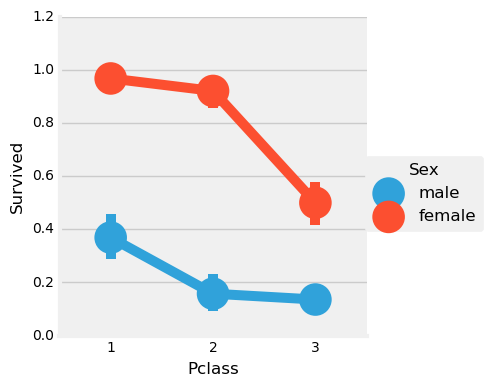

In [246]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

/home/aditya/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


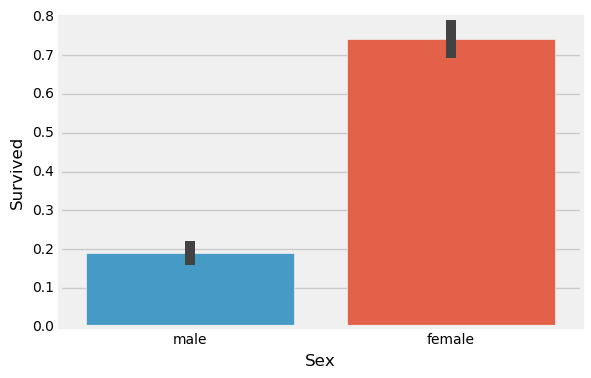

In [247]:
sns.barplot(x='Sex',y='Survived',data=data)


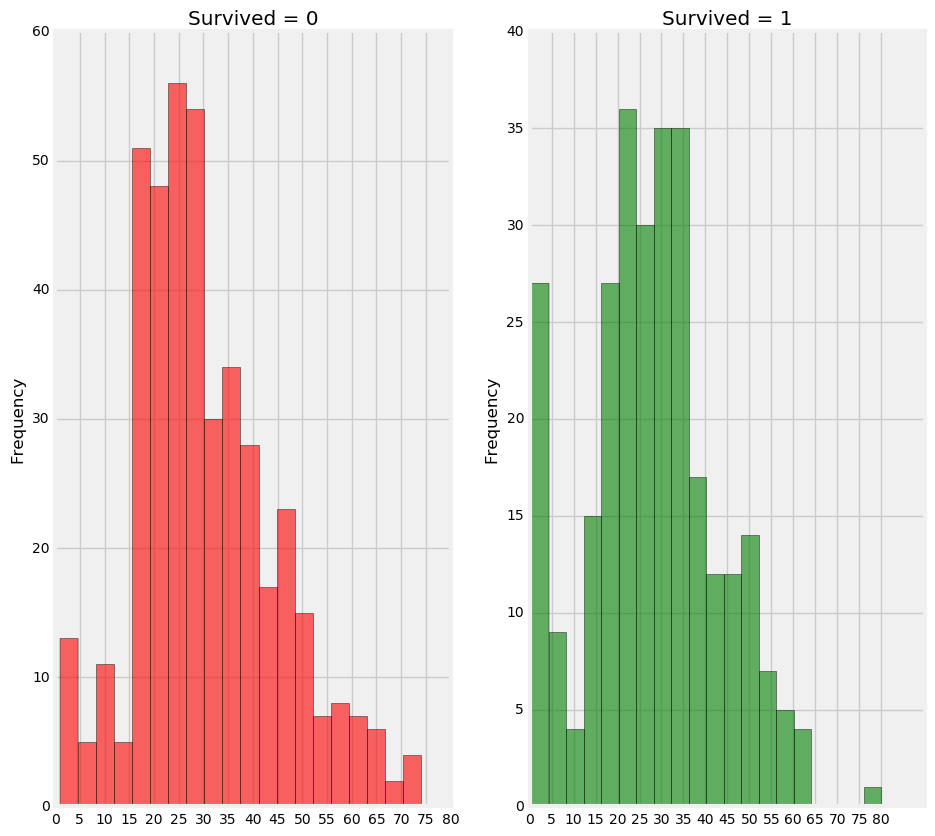

In [248]:
f,ax=plt.subplots(1,2,figsize=(10,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red',alpha=0.6)
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green',alpha=0.6)
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_title('Survived = 1')
plt.show()

<h3> Inference</h3>
<br>
<p><b>(1) First priority during Rescue is given to children and women, as the persons less than 5 are save by large numbers (2) The oldest saved passanger is of 80 (3) The most deaths were between 20-40</b>

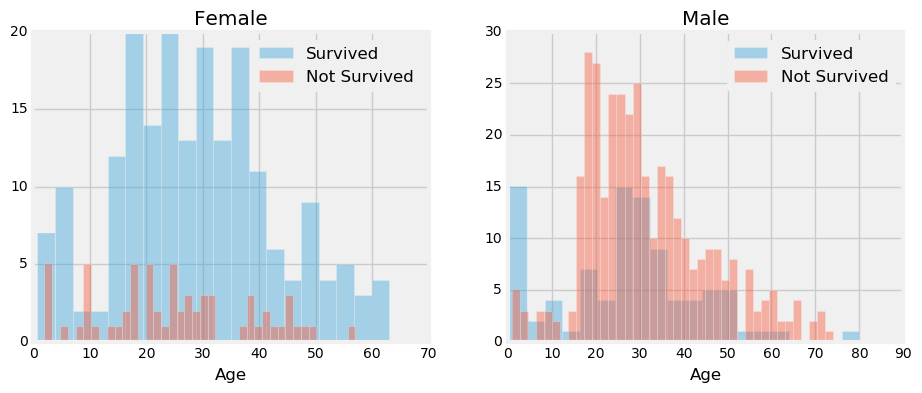

In [249]:
women = data[data['Sex']=='female']
men = data[data['Sex']=='male']
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(),label='Survived',bins=20,ax=axes[0],kde=False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(),label='Not Survived',bins=40,ax=axes[0],kde=False)
ax.set_title('Female')
ax.legend()
ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(),label='Survived',bins=20,ax=axes[1],kde=False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(),label='Not Survived',bins=40,ax=axes[1],kde=False)
ax.set_title('Male')
ax.legend()

<h2>Inference</h2>

Females between Age of 15 and 40 had high chances of survival. Also we can notice that females infants/toddlers also had a higher chance of survival. This may be because females have given preference while embarking.

While Males between Age of 20 and 35 had higher chances of survival. This is almost same as women

People who travelled in first class had higher chances of survival ( they were housed in upper decks of the ship ).